# Lesson 3

In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Question 1

In [5]:
# I am going to calculate the number of seconds in the month of June:
day_seconds = 60*60*24
month_seconds = day_seconds*30
print("The number of seconds in a month is:")
print(month_seconds)

The number of seconds in a month is:
2592000


#### Queston 2

In [6]:
# This is the number of seconds between June 1, 1200 and 14 August, 0930
from datetime import timedelta
time_elapsed = timedelta(weeks=10, days=3, hours=21, minutes=30, seconds=0)
print("The number of seconds between 1 June, 1200 and 14 Aug, 0930 is:")
print(time_elapsed.total_seconds())

The number of seconds between 1 June, 1200 and 14 Aug, 0930 is:
6384600.0


#### Question 3a

In [7]:
import pandas as pd

# The following dataset gives the world population starting at 1950 and ending at 2016:
world_population = pd.read_csv("world_population.csv")

# Since it doesn't include years, I am going to add those here
years = pd.DataFrame(list(range(1950, 2017)), columns=['Year'])
years = pd.DataFrame(years)
years = years.merge(world_population, right_index=True, left_index=True)

# Let's figure out the population in 2015:
print(years.loc[years['Year'] == 2015])

    Year  Population
65  2015  7256490011


#### Question 3b

In [9]:
# Population difference between 2015 and 1950:
pop_change = years.iloc[-1, 1] - years.iloc[0, 1]
print(pop_change)

4698861357


#### Question 3c

In [13]:
# Average annual growth rate is (changed/initial) ** (1/t) - 1
initial = years.iloc[0, 1]
t = 65

# Gotta fix this it's not right yet
(pop_change - initial)/initial

0.8371945237832794

#### Question 4a

In [18]:
titanic = pd.read_csv("titanic_train.csv")
titanic.rename(columns={'Pclass': 'Passenger_class'}, inplace=True)

PassengerId  Survived  Passenger_class  \
0              1         0                3   
1              2         1                1   
2              3         1                3   
3              4         1                1   
4              5         0                3   
5              6         0                3   
6              7         0                1   
7              8         0                3   
8              9         1                3   
9             10         1                2   
10            11         1                3   
11            12         1                1   
12            13         0                3   
13            14         0                3   
14            15         0                3   
15            16         1                2   
16            17         0                3   
17            18         1                2   
18            19         0                3   
19            20         1                3   
20            21         0                2   
21            22         1                2   
22            23         1                3   
23            24         1                1   
24            25         0                3   
25            26         1                3   
26            27         0                3   
27            28         0                1   
28            29         1                3   
29            30         0                3   
..           ...       ...              ...   
861          862         0                2   
862          863         1                1   
863          864         0                3   
864          865         0                2   
865          866         1                2   
866          867         1                2   
867          868         0                1   
868          869         0                3   
869          870         1                3   
870          871         0                3   
871          872         1                1   
872          873         0                1   
873          874         0                3   
874          875         1                2   
875          876         1                3   
876          877         0                3   
877          878         0                3   
878          879         0                3   
879          880         1                1   
880          881         1                2   
881          882         0                3   
882          883         0                3   
883          884         0                2   
884          885         0                3   
885          886         0                3   
886          887         0                2   
887          888         1                1   
888          889         0                3   
889          890         1                1   
890          891         0                3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male 

#### Question 4b

In [21]:
# Add columns "SibSp" and "Parch" to create "Family_Size"
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']

#### Question 4c

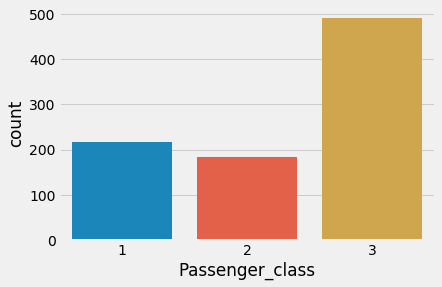

In [23]:
import seaborn as sns
ax = sns.countplot(x="Passenger_class", data=titanic)

#### Question 4d
Sort by age:

In [29]:
titanic = titanic.sort_values('Age', ascending=True)
print(titanic[0:5])

     PassengerId  Survived  Passenger_class                             Name  \
803          804         1                3  Thomas, Master. Assad Alexander   
755          756         1                2        Hamalainen, Master. Viljo   
644          645         1                3           Baclini, Miss. Eugenie   
469          470         1                3    Baclini, Miss. Helene Barbara   
78            79         1                2    Caldwell, Master. Alden Gates   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Family_Size  
803    male  0.42      0      1    2625   8.5167   NaN        C            1  
755    male  0.67      1      1  250649  14.5000   NaN        S            2  
644  female  0.75      2      1    2666  19.2583   NaN        C            3  
469  female  0.75      2      1    2666  19.2583   NaN        C            3  
78     male  0.83      0      2  248738  29.0000   NaN        S            2  


#### Question 4e

In [30]:
titanic = titanic.sort_values('Age', ascending=False)
print(titanic[0:5])
# It wants me to fix the NaN issue but the way I did it was right the first time.

     PassengerId  Survived  Passenger_class  \
630          631         1                1   
851          852         0                3   
96            97         0                1   
493          494         0                1   
116          117         0                3   

                                     Name   Sex   Age  SibSp  Parch    Ticket  \
630  Barkworth, Mr. Algernon Henry Wilson  male  80.0      0      0     27042   
851                   Svensson, Mr. Johan  male  74.0      0      0    347060   
96              Goldschmidt, Mr. George B  male  71.0      0      0  PC 17754   
493               Artagaveytia, Mr. Ramon  male  71.0      0      0  PC 17609   
116                  Connors, Mr. Patrick  male  70.5      0      0    370369   

        Fare Cabin Embarked  Family_Size  
630  30.0000   A23        S            0  
851   7.7750   NaN        S            0  
96   34.6542    A5        C            0  
493  49.5042   NaN        C            0  
116   7.7500   

#### Question 4f

In [53]:
# How many are there in each class?
print(titanic['Passenger_class'].value_counts())

# For class 1
print("Out of 216 class 1 passengers, this many survived:")
survived_1 = titanic[(titanic.Passenger_class == 1) & (titanic.Survived == 1)]
print(survived_1.shape[0])
print("That makes a survival rate of:")
print(survived_1.shape[0]/216)

# For class 2
print("Out of 216 class 2 passengers, this many survived:")
survived_2 = titanic[(titanic.Passenger_class == 2) & (titanic.Survived == 1)]
print(survived_2.shape[0])
print("That makes a survival rate of:")
print(survived_2.shape[0]/216)

# For class 3
print("Out of 216 class 3 passengers, this many survived:")
survived_3= titanic[(titanic.Passenger_class == 3) & (titanic.Survived == 1)]
print(survived_3.shape[0])
print("That makes a survival rate of:")
print(survived_3.shape[0]/216)

3    491
1    216
2    184
Name: Passenger_class, dtype: int64
Out of 216 class 1 passengers, this many survived:
136
That makes a survival rate of:
0.6296296296296297
Out of 216 class 2 passengers, this many survived:
87
That makes a survival rate of:
0.4027777777777778
Out of 216 class 3 passengers, this many survived:
119
That makes a survival rate of:
0.5509259259259259


#### Question 4g

In [57]:
# What was the overall survival rate?
print((survived_1.shape[0] + survived_2.shape[0] + survived_3.shape[0]) / titanic.shape[0])

0.3838383838383838


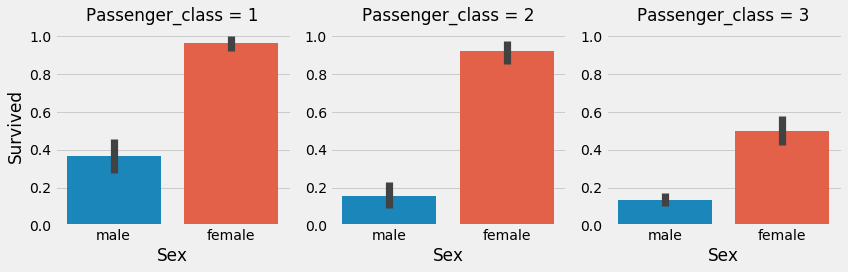

In [60]:
# What was the gender distribution of each class?
sns.factorplot("Sex", "Survived", col="Passenger_class", data=titanic, kind="bar")